In [5]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [7]:
# import the required dataset
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

no null or missing values are present in the dataset

In [ ]:
# now we will do some statistical analysis with data

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Analysis of categorical Features

In [25]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

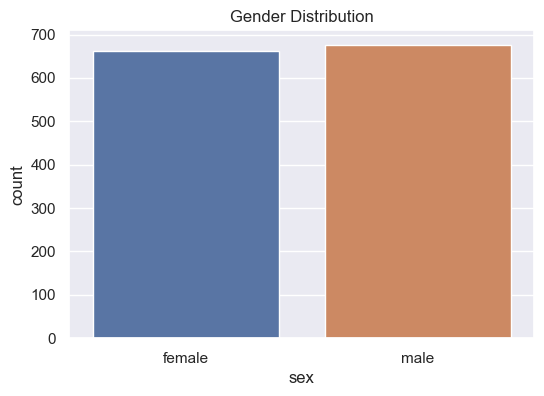

In [24]:
# since sex is categorical column we will go for count plot
plt.figure(figsize=(6,4))
sns.countplot(df['sex'],data=df)
plt.title("Gender Distribution")
plt.show()

In [26]:
# smoker-categorical column
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

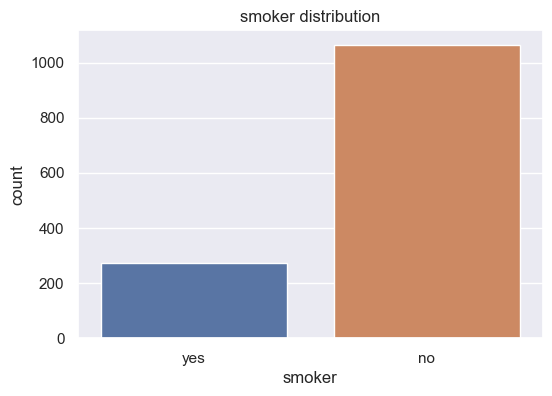

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(df['smoker'],data=df)
plt.title("smoker distribution")
plt.show()

ratio is almost balanced

majority of people are not smoker

In [31]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

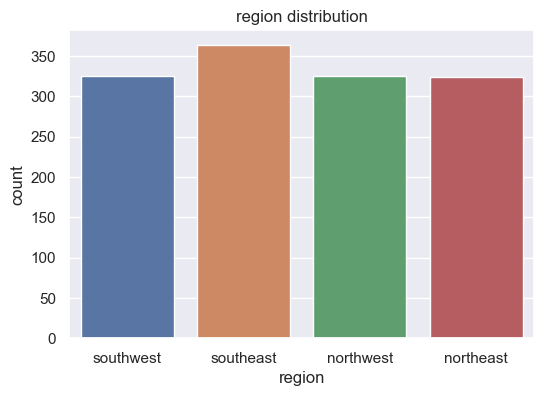

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(df['region'],data=df)
plt.title("region distribution")
plt.show()

maximum people belong to southeast

In [33]:
# number of children distribution
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

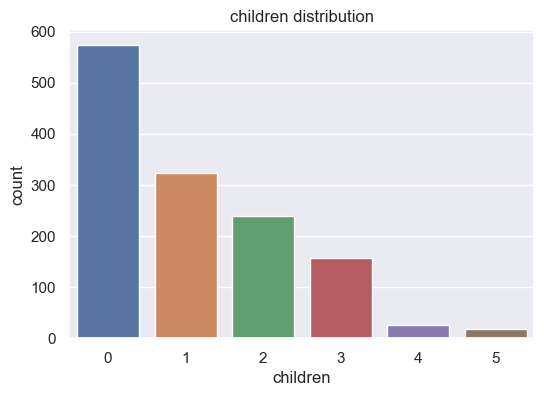

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(df['children'],data=df)
plt.title("children distribution")
plt.show()

## Analysis of Continuous features

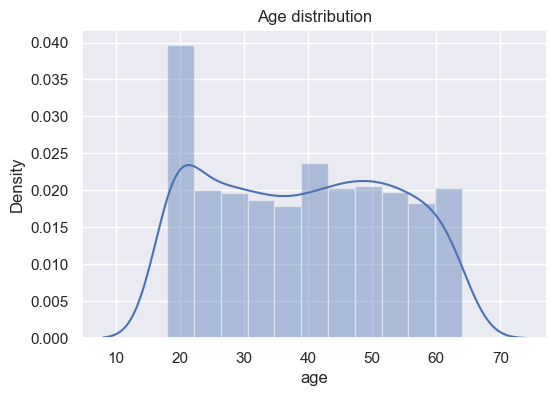

In [21]:
# first we will find distribution of age column
sns.set()
plt.figure(figsize=(6,4))
sns.distplot(df['age'])  # since age is continuous column that why we go for histogram
plt.title("Age distribution")
plt.show()

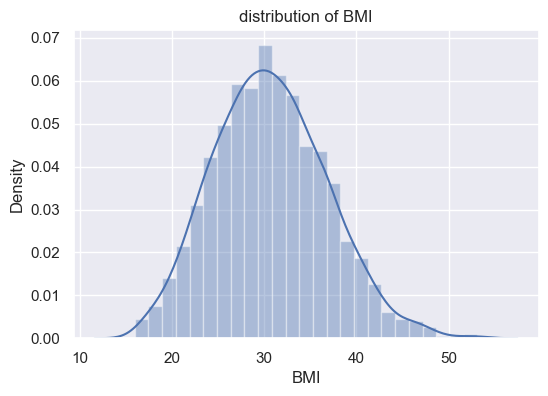

In [38]:
# distribution of bmi
plt.figure(figsize=(6,4))
sns.distplot(x=df["bmi"])
plt.xlabel("BMI")
plt.title("distribution of BMI")
plt.show()

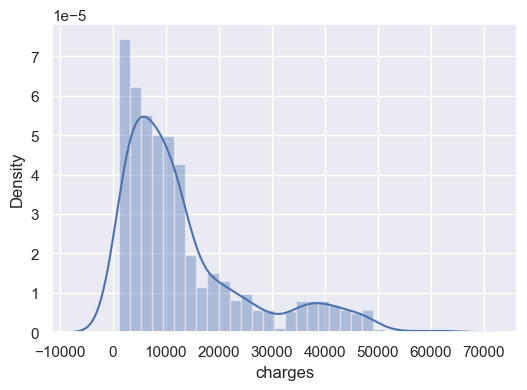

In [41]:
# distribution of charges column
plt.figure(figsize=(6,4))
sns.distplot(df['charges'])
plt.show()

majority of the people have paid from 2000 to 15 thousand and this is example of positive skewed distribution

### Data preprocessing

In [43]:
# since we have three categorical feauteres and to which we cant feed to model directly we will od featue encoding 

In [44]:
# sex
df.replace({'sex':{'male':1,'female':0}},inplace=True)

# smoker
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)

# region
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### splitting the data into featues and target

In [47]:
X=df.drop('charges',axis=1)
y=df['charges']

In [49]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2


In [50]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### splitting data into train and test

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=41)

In [71]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### training the model- Linear model

In [72]:
model=LinearRegression()

In [73]:
model.fit(X_train,y_train)

LinearRegression()

### model  Evaluation

In [74]:
from sklearn import metrics

In [75]:
# lets check prediction on training data
train_prediction=model.predict(X_train)

In [76]:
train_pred_acc=metrics.r2_score(y_train,train_prediction)
print("accuracy on training data prediciton",round(train_pred_acc,2))

accuracy on training data prediciton 0.76


In [77]:
# prediction on test data
test_prediction=model.predict(X_test)

In [66]:
test_pred_acc=metrics.r2_score(y_test,test_prediction)
print("accuracy on testing data prediciton",round(test_pred_acc,2))

accuracy on testing data prediciton 0.69


### building predictive system

In [82]:
input_data=(62,0,26.29,0,1,0)

# need to change this tuple into array
input_data_as_np_array=np.asarray(input_data)

# reshape the array since we are calculating for only one instance
reshaped_data=input_data_as_np_array.reshape(1,-1)

#prediciton
prediction=model.predict(reshaped_data)

#result
print(prediction)

print("The medical cost for insurance is ",round(prediction[0],2))

[35863.69020942]
The medical cost for insurance is  35863.69


### The EnD !!!
